In [234]:
import yaml
import matplotlib.pyplot as plt

import os
import scripts.autoware_analyzer_lib as aa
import numpy as np
import copy

In [235]:
EXPERIMENT = '5'
FIG_SIZE = (10,6)

roi_range =[0.27, 0.91]

video = {
    '5': [67, 62],
    '7': [31, 51],
}

In [236]:
with open('yaml/autoware_analyzer.yaml') as f:
    configs = yaml.load(f, Loader=yaml.FullLoader)

chain_info = configs['node_chain']
avoidance_x_range = configs['avoidance_x_range']
target_speed = configs['target_speed']

In [237]:
i = 0
experiment_title = configs['experiment_title'][i]
output_title = configs['output_title'][i]
first_node = configs['first_node'][i]
last_node = configs['last_node'][i]
deadline = configs['E2E_deadline'][i]        

source_path1 = 'results/' + experiment_title[0]
source_path2 = 'results/' + experiment_title[1]

n = aa.get_number_of_files(source_path1)
is_collapsed_list = []
is_matching_failed_list = []
max_miss_alignment_delay_list = []
avg_miss_alignment_delay_list = []
# pbar = tqdm(range(n))
# pbar.set_description(output_title)

In [238]:
idx = 0 

experiment_info_path = source_path1 + '/' + str(idx) + '/experiment_info.yaml'
experiment_info = aa.get_experiment_info(experiment_info_path)
is_collapsed = experiment_info['is_collaped']
is_collapsed_list.append(is_collapsed)

In [239]:
# Center offset
center_offset_path1= source_path1 + '/' + str(idx) + '/center_offset.csv'
center_offset1, max_center_offset1, avg_center_offset1 \
    = aa.get_center_offset(center_offset_path1)
instances1 = aa.get_instances(center_offset_path1)
start_instance1 = int(instances1[0])
end_instance1 = int(instances1[-1])
info1 = {
    'center_offset_path': center_offset_path1,
    'center_offset': center_offset1,
    'max_center_offset': max_center_offset1,
    'avg_center_offset': avg_center_offset1,
}

center_offset_path2= source_path2 + '/' + str(idx) + '/center_offset.csv'
center_offset2, max_center_offset2, avg_center_offset2 \
    = aa.get_center_offset(center_offset_path2)
instances2 = aa.get_instances(center_offset_path2)
start_instance2 = int(instances2[0])
end_instance2 = int(instances2[-1])
info2 = {
    'center_offset_path': center_offset_path2,
    'center_offset': center_offset2,
    'max_center_offset': max_center_offset2,
    'avg_center_offset': avg_center_offset2,
}

In [240]:
### center offset

dir_path = info1['center_offset_path']

exp_title1 = dir_path.split('/')[1]
exp_title2 = info2['center_offset_path'].split('/')[1]
exp_id = dir_path.split('/')[2]

In [241]:
### Trajectory
output_dir_path = os.path.join('analyzation', output_title, 'trajectories')
if not os.path.exists(output_dir_path): os.system('mkdir -p ' + output_dir_path)

In [242]:
# Centerline
center_line_path = source_path1 + '/' + str(idx) + '/center_line.csv'
center_line = aa.get_center_line(center_line_path)
center_line_x = []
center_line_y = []

for center_line_point in center_line:
    center_line_x.append(float(center_line_point[0]))
    center_line_y.append(float(center_line_point[1]))  

In [243]:
center_offset_path1 = source_path1 + '/' + str(idx) + '/center_offset.csv'
center_offset_path2 = source_path2 + '/' + str(idx) + '/center_offset.csv'


waypoints1 = aa.get_waypoints(center_offset_path1, configs['simulator'])

waypoints_x1 = []
waypoints_y1 = []

for waypoint in waypoints1:
    waypoints_x1.append(float(waypoint[0]))
    waypoints_y1.append(float(waypoint[1]))


waypoints2 = aa.get_waypoints(center_offset_path2, configs['simulator'])

waypoints_x2 = []
waypoints_y2 = []

for waypoint in waypoints2:
    waypoints_x2.append(float(waypoint[0]))
    waypoints_y2.append(float(waypoint[1]))

In [244]:
mask1 = [True if (xx<=256.2 and yy>210.3) or (xx<=261.3 and yy<=210.3) else False for xx, yy in zip(waypoints_x1, waypoints_y1)]
mask2 = [True if (xx<=256.2 and yy>210.3) or (xx<=261.3 and yy<=210.3) else False for xx, yy in zip(waypoints_x2, waypoints_y2)]


filtered_x1, filtered_y1 = zip(*[[xx, yy] for xx, yy in zip(waypoints_x1, waypoints_y1) if (xx<=256.2 and yy>210.3) or (xx<=261.3 and yy<=210.3)])
filtered_x2, filtered_y2 = zip(*[[xx, yy] for xx, yy in zip(waypoints_x2, waypoints_y2) if (xx<=256.2 and yy>210.3) or (xx<=261.3 and yy<=210.3)])
filtered_center_x, filtered_center_y = zip(*[[xx, yy] for xx, yy in zip(center_line_x, center_line_y) if (xx<=256.2 and yy>210.3) or (xx<=261.3 and yy<=210.3)])

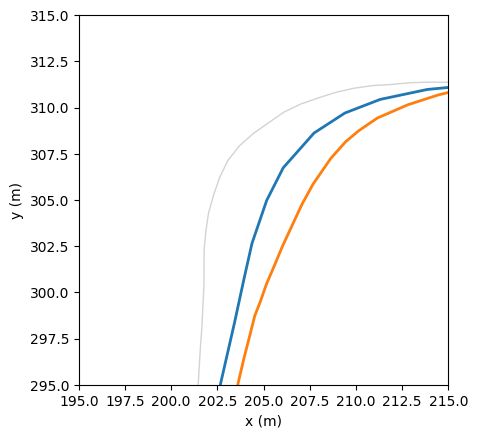

In [245]:

# plt.plot(filtered_center_x, filtered_center_y, label='Center line', color='lightgray', linewidth=1)
# plt.plot(filtered_x1, filtered_y1, label=experiment_title[0], color='red', linestyle='-', linewidth=2)
# plt.plot(filtered_x2, filtered_y2, label=experiment_title[1], color='blue', linestyle='-', linewidth=2)

plt.plot(center_line_x, center_line_y, label='Center line', color='lightgray', linewidth=1)
plt.plot(waypoints_x2, waypoints_y2, label='rubis', linestyle='-', linewidth=2)
plt.plot(waypoints_x1, waypoints_y1, label='default', linestyle='-', linewidth=2)

plot_path = output_dir_path + '/' + exp_title1 + '_' +  exp_title2 + '_' + exp_id + '_waypoints_detail.png'

plt.xlim(195, 215)
plt.ylim(295, 315)

plt.xlabel('x (m)')
plt.ylabel('y (m)')
# plt.title('waypoints')
# plt.legend()
plt.gca().set_aspect('equal')
plt.savefig(plot_path, dpi=300)
plt.show()
plt.close()

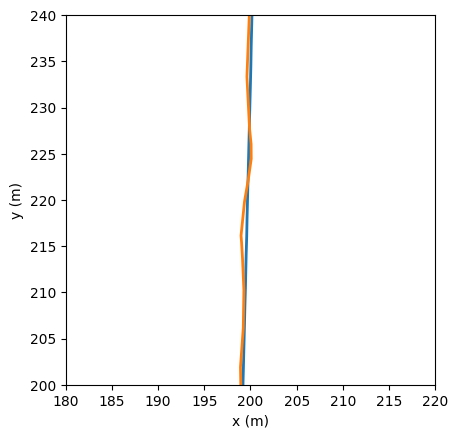

In [248]:
plt.plot(center_line_x, center_line_y, label='Center line', color='lightgray', linewidth=1)
plt.plot(waypoints_x2, waypoints_y2, label='rubis', linestyle='-', linewidth=2)
plt.plot(waypoints_x1, waypoints_y1, label='default', linestyle='-', linewidth=2)

plot_path = output_dir_path + '/' + exp_title1 + '_' +  exp_title2 + '_' + exp_id + '_waypoints_detail_middle.png'

plt.xlim(180, 220)
plt.ylim(200, 240)
# plt.ylim(250, 290)

plt.xlabel('x (m)')
plt.ylabel('y (m)')
# plt.legend()
plt.gca().set_aspect('equal')
plt.savefig(plot_path)
plt.show()
plt.close()

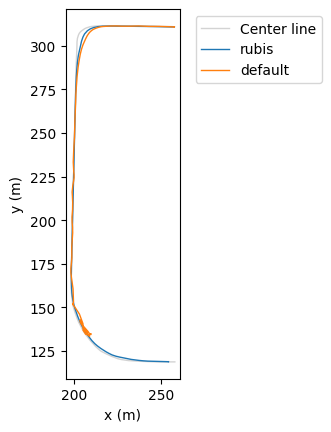

In [249]:

filtered_waypoints_x1, filtered_waypoints_y1 = zip(*[[xx, yy] for xx, yy in zip(waypoints_x1, waypoints_y1) if not (xx>=210 and yy<250)])

plt.plot(center_line_x, center_line_y, label='Center line', color='lightgray', linewidth=1)
plt.plot(waypoints_x2, waypoints_y2, label='rubis', linestyle='-', linewidth=1)
plt.plot(filtered_waypoints_x1, filtered_waypoints_y1, label='default', linestyle='-', linewidth=1)


exp_title = source_path1.split('/')[1]
plot_path = output_dir_path + '/' + exp_title1 + '_' +  exp_title2 + '_' + exp_id + '_waypoints.png'

plt.xlabel('x (m)')
plt.ylabel('y (m)')
# plt.title('waypoints')
plt.legend(loc='upper right', bbox_to_anchor=(2.3, 1.0))
plt.gca().set_aspect('equal')
plt.savefig(plot_path, dpi=300)
plt.show()
plt.close()

In [250]:
### center offset
output_dir_path = os.path.join('analyzation', output_title, 'center_offsets')
if not os.path.exists(output_dir_path): os.system('mkdir -p ' + output_dir_path)

In [251]:
# plot datas

# x1_data = np.array(list(info1['center_offset'].keys()))[mask1] # Instance IDs
# y1_data = np.array(list(info1['center_offset'].values()))[mask1] # Center offset(m)
# x2_data = np.array(list(info2['center_offset'].keys()))[mask2] # Instance IDs
# y2_data = np.array(list(info2['center_offset'].values()))[mask2] # Center offset(m)
# plot_path = output_dir_path+'/' + exp_title1 + '_' +  exp_title2 + '_' + exp_id + '_center_offset.png'

# aligned_x1 = [(xx-min(x1_data)) * (video[EXPERIMENT][0] / (x1_data[-1]-x1_data[0])) for xx in x1_data]
# aligned_x2 = [(xx-min(x2_data)) * (video[EXPERIMENT][1] / (x2_data[-1]-x2_data[0])) for xx in x2_data]



x1_data = np.array(list(info1['center_offset'].keys())) # Instance IDs
y1_data = np.array(list(info1['center_offset'].values())) # Center offset(m)
x2_data = np.array(list(info2['center_offset'].keys())) # Instance IDs
y2_data = np.array(list(info2['center_offset'].values())) # Center offset(m)
plot_path = output_dir_path+'/' + exp_title1 + '_' +  exp_title2 + '_' + exp_id + '_center_offset.png'


aligned_x1 = [xx-min(x1_data) for xx in x1_data]
aligned_x2 = [xx-min(x2_data) for xx in x2_data]

In [252]:
# # for 230418_v05
trim_idx = [21, 24]

# # for 230418_v07
# trim_idx = [18, 21]

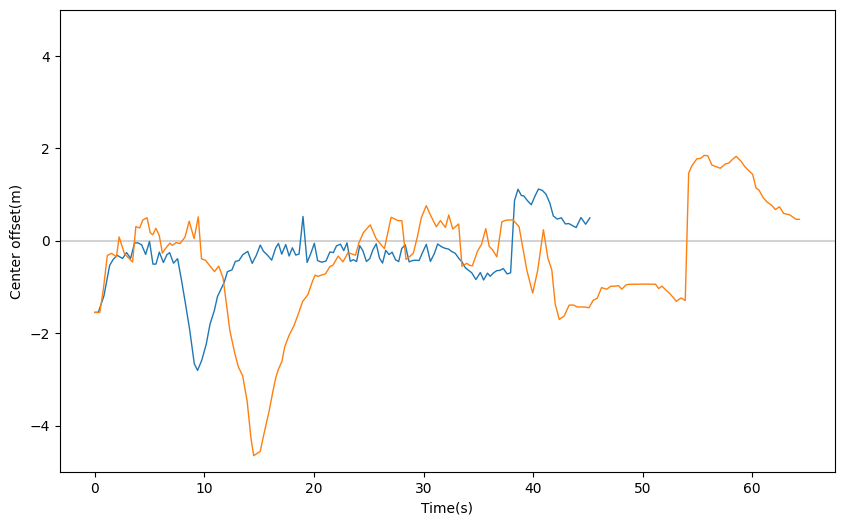

In [253]:
plt.figure(figsize=FIG_SIZE)

plt.axhline(y = 0, color = 'lightgray', label='Center line')
# plt.plot(aligned_x1, [abs(yy) for yy in y1_data], label='default', color='red', linestyle='-', linewidth=1)
# plt.plot(aligned_x2, [abs(yy) for yy in y2_data], label='rubis', color='blue', linestyle='-', linewidth=1)

plt.plot(aligned_x2[:-trim_idx[1]], y2_data[:-trim_idx[1]], label='rubis', linestyle='-', linewidth=1)
plt.plot(aligned_x1[:-trim_idx[0]], y1_data[:-trim_idx[0]], label='default', linestyle='-', linewidth=1)

# plt.axhline(y = max_center_offset, color = 'r', linestyle = ':', label='Max')
# plt.axhline(y = avg_center_offset, color = 'b', linestyle = ':', label='Avg')    

plt.ylim([-5,5])
# plt.legend()    
plt.xlabel('Time(s)')
plt.ylabel('Center offset(m)')
# plt.title('Center offset')
plt.savefig(plot_path, dpi=300)
plt.show()
plt.close()

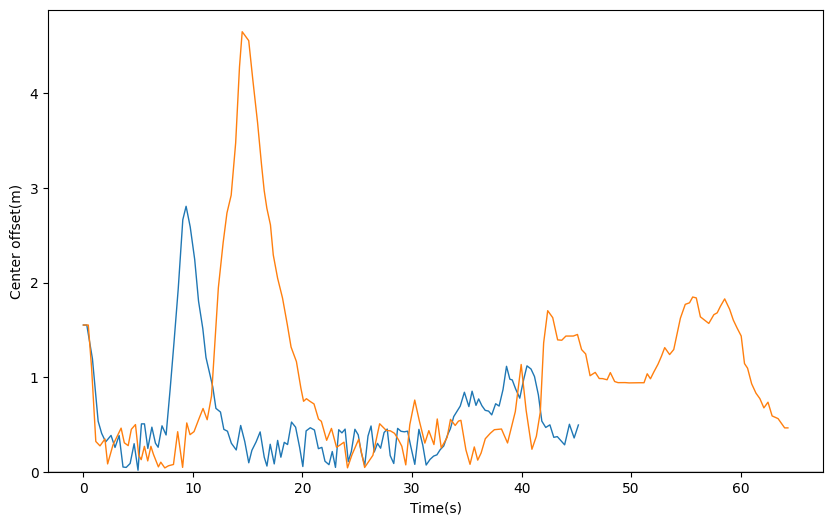

In [254]:
plot_path = output_dir_path+'/' + exp_title1 + '_' +  exp_title2 + '_' + exp_id + '_center_offset_abs.png'

plt.figure(figsize=FIG_SIZE)


plt.axhline(y = 0, color = 'lightgray', label='Center line')
plt.plot(aligned_x2[:-trim_idx[1]], [abs(yy) for yy in y2_data[:-trim_idx[1]]], label='rubis', linestyle='-', linewidth=1)
plt.plot(aligned_x1[:-trim_idx[0]], [abs(yy) for yy in y1_data[:-trim_idx[0]]], label='default', linestyle='-', linewidth=1)

# plt.plot(aligned_x1, y1_data, label='default', color='red', linestyle='-', linewidth=1)
# plt.plot(aligned_x2, y2_data, label='rubis', color='blue', linestyle='-', linewidth=1)

# plt.axhline(y = max_center_offset, color = 'r', linestyle = ':', label='Max')
# plt.axhline(y = avg_center_offset, color = 'b', linestyle = ':', label='Avg')    

plt.ylim([0, None])
# plt.legend()    
plt.xlabel('Time(s)')
plt.ylabel('Center offset(m)')
# plt.title('Center offset')
plt.savefig(plot_path, dpi=300)
plt.show()
plt.close()

In [255]:
# E2E response time
avoidance_start_instance1, avoidance_end_instance1 = aa.get_instance_pair(info1['center_offset_path'], avoidance_x_range[0], avoidance_x_range[1], configs['simulator'])
response_time_path = source_path1 + '/' + str(idx) + '/response_time'

exp_title = response_time_path.split('/')[1]
exp_id = response_time_path.split('/')[2]

type = 'shortest'

output_dir_path = os.path.join('analyzation', output_title, type + '_E2E_response_time')
if not os.path.exists(output_dir_path): os.system('mkdir -p ' + output_dir_path)

In [256]:
first_node_path1 = source_path1 + '/' + str(idx) + '/response_time/' + first_node + '.csv'
last_node_path1 = source_path1 + '/' + str(idx) + '/response_time/' + last_node + '.csv'

E2E_response_time1, max_E2E_response_time1, avg_E2E_response_time1 \
                = aa.get_E2E_response_time(first_node_path1, last_node_path1, start_instance1, end_instance1, type=type)

first_node_path2 = source_path2 + '/' + str(idx) + '/response_time/' + first_node + '.csv'
last_node_path2 = source_path2 + '/' + str(idx) + '/response_time/' + last_node + '.csv'

E2E_response_time2, max_E2E_response_time2, avg_E2E_response_time2 \
                = aa.get_E2E_response_time(first_node_path2, last_node_path2, start_instance2, end_instance2, type=type)


In [257]:
# Plot graph

filter = 1.0

x_data1 = list(E2E_response_time1.keys())
y_data1 = list(E2E_response_time1.values())
# x_data1 = x_data1[int(len(x_data1)*roi_range[0]):int(len(x_data1)*roi_range[1])]
# y_data1 = y_data1[int(len(y_data1)*roi_range[0]):int(len(y_data1)*roi_range[1])]

x_data2 = list(E2E_response_time2.keys())
y_data2 = list(E2E_response_time2.values())
# x_data2 = x_data2[int(len(x_data2)*roi_range[0]):int(len(x_data2)*roi_range[1])]
# y_data2 = y_data2[int(len(y_data2)*roi_range[0]):int(len(y_data2)*roi_range[1])]

In [258]:
print(x_data1[0], x_data1[-1], x_data1[-1]-x_data1[0])
print(x_data2[0], x_data2[-1], x_data2[-1]-x_data2[0])

381 1312 931
1730 2432 702


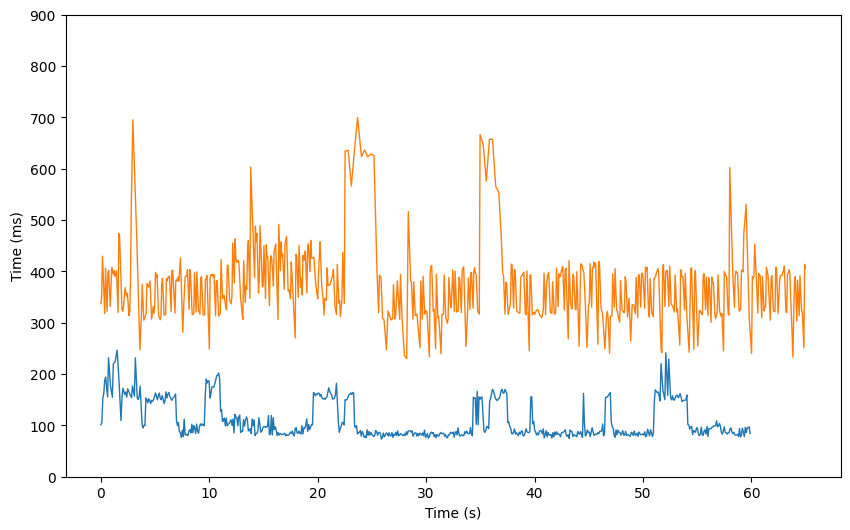

In [259]:
# Plot graph
filter = 1.0

plot_path = output_dir_path+'/' + exp_title1 + '_' +  exp_title2 + '_' + exp_id + '_' + type + '_E2E_plot.png'

aligned_x1 = [(xx-min(x_data1)) * (video[EXPERIMENT][0] / (x_data1[-1]-x_data1[0])) for xx in x_data1]
aligned_x2 = [(xx-min(x_data2)) * (video[EXPERIMENT][1] / (x_data2[-1]-x_data2[0])) for xx in x_data2]

# aligned_x1 = [xx-min(x_data1) for xx in x_data1]
# aligned_x2 = [xx-min(x_data2) for xx in x_data2]

plt.figure(figsize=FIG_SIZE)

plt.plot(aligned_x2[:-trim_idx[1]], y_data2[:-trim_idx[1]], label='rubis', linestyle='-', linewidth=1)
plt.plot(aligned_x1[:-trim_idx[0]], y_data1[:-trim_idx[0]], label='default', linestyle='-', linewidth=1)

# plt.axhline(y = max_E2E_response_time1, color = 'r', linestyle = ':', label='Max')
# plt.axhline(y = avg_E2E_response_time1, color = 'b', linestyle = ':', label='Avg')    
# plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Time (ms)')
plt.yticks(np.arange(0,1000,100))
# plt.title('E2E Response Time (ms)')
plt.savefig(plot_path, dpi=300)
plt.show()
plt.close()

In [260]:
### Speed
output_dir_path = os.path.join('analyzation', output_title, 'speeds')
if not os.path.exists(output_dir_path): os.system('mkdir -p ' + output_dir_path)

In [261]:
center_offset_path1 = source_path1 + '/' + str(idx) + '/center_offset.csv'
center_offset_path2 = source_path2 + '/' + str(idx) + '/center_offset.csv'


speed1 = aa.get_speed(center_offset_path1, configs['simulator'])
speed2 = aa.get_speed(center_offset_path2, configs['simulator'])

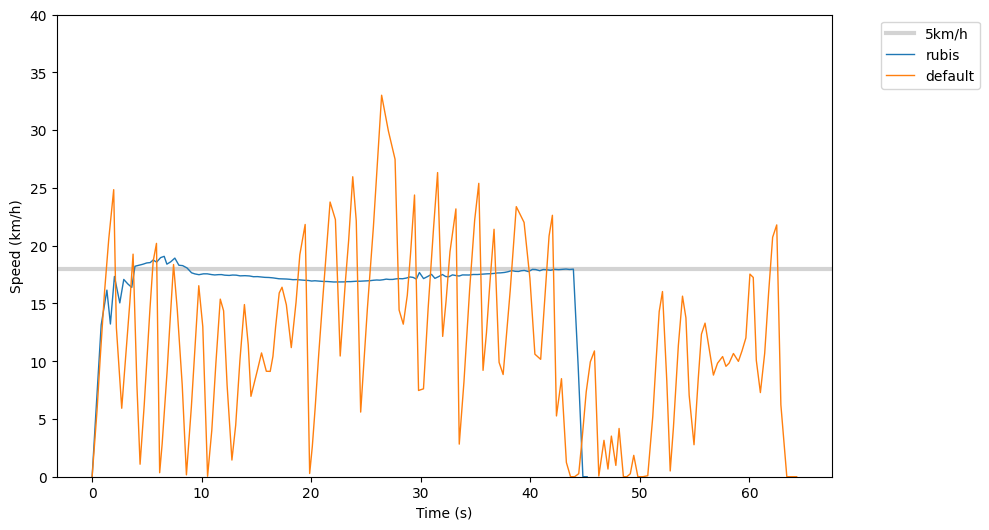

In [262]:
# x1_data = np.array(list(speed1.keys()))[mask1] # Instance IDs
# y1_data = np.array(list(speed1.values()))[mask1] # Center offset(m)
# x2_data = np.array(list(speed2.keys()))[mask2] # Instance IDs
# y2_data = np.array(list(speed2.values()))[mask2] # Center offset(m)

# aligned_x1 = np.array([(xx-min(x1_data)) * (video[EXPERIMENT][0] / (x1_data[-1]-x1_data[0])) for xx in x1_data])
# aligned_x2 = np.array([(xx-min(x2_data)) * (video[EXPERIMENT][1] / (x2_data[-1]-x2_data[0])) for xx in x2_data])

plt.figure(figsize=FIG_SIZE)

x1_data = np.array(list(speed1.keys())) # Instance IDs
y1_data = np.array(list(speed1.values())) # Center offset(m)
x2_data = np.array(list(speed2.keys())) # Instance IDs
y2_data = np.array(list(speed2.values())) # Center offset(m)

aligned_x1 = np.array([xx-min(x1_data) for xx in x1_data])
aligned_x2 = np.array([xx-min(x2_data) for xx in x2_data])

# plt.axhline(y = int(EXPERIMENT)*3.6, color = 'darkgray', label=EXPERIMENT+'km/h', linewidth=5)
plt.axhline(y = 5*3.6, color = 'lightgray', label='5km/h', linewidth=3)
plt.plot(aligned_x2[:-trim_idx[1]], y2_data[:-trim_idx[1]], label='rubis', linestyle='-', linewidth=1)
plt.plot(aligned_x1[:-trim_idx[0]], y1_data[:-trim_idx[0]], label='default', linestyle='-', linewidth=1)

### data smoothing
# cubic_interpolation_model1 = interp1d(aligned_x1, y1_data, kind = 'cubic')
# smooth_x1 = np.linspace(aligned_x1.min(), aligned_x1.max(), 500)
# smooth_y1 = cubic_interpolation_model1(smooth_x1)

# cubic_interpolation_model2 = interp1d(aligned_x2, y2_data, kind = 'cubic')
# smooth_x2 = np.linspace(aligned_x2.min(), aligned_x2.max(), 500)
# smooth_y2 = cubic_interpolation_model2(smooth_x2)

# plt.axhline(y = 17.5, color = 'lightgray', label='5km/h', linewidth=5)
# plt.plot(smooth_x1, smooth_y1, label='default', color='red', linestyle='-', linewidth=1)
# plt.plot(smooth_x2, smooth_y2, label='rubis', color='blue', linestyle='-', linewidth=1)

plot_path = output_dir_path+'/' + exp_title1 + '_' +  exp_title2 + '_' + exp_id + '_speed.png'

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.ylim(0, 40)
plt.xlabel('Time (s)')
plt.ylabel('Speed (km/h)')
# plt.title('Speed (km/h)')
plt.savefig(plot_path, dpi=300)
plt.show()
plt.close()